# **Mario Hernández**

#Actividad 2: Construcción guiada de métricas de similitud para el análisis de corpus mediante ejercicios prácticos.

En esta actividad, se construirá una herramienta de procesamiento de lenguaje natural (PLN): un recomendador de sinónimos y palabras relacionadas. Esta herramienta será útil para mejorar la escritura, evitar la repetición de palabras y enriquecer el vocabulario.

Se utilizarán dos recursos lingüísticos muy potentes:

*   **WordNet:** Una base de datos léxica que agrupa palabras en conjuntos de sinónimos (synsets) y define relaciones semánticas entre ellos.
*   **GloVe (Global Vectors for Word Representation):** Un modelo de representación de palabras que convierte palabras en vectores numéricos, capturando similitudes semánticas y relaciones entre palabras basadas en su co-ocurrencia en grandes corpus de texto.

**Objetivos del Ejercicio**

1.  **Comprender Conceptos Clave:**
    *   Sinónimos y relaciones semánticas.
    *   Representaciones vectoriales de palabras (word embeddings).
    *   Preprocesamiento de texto (tokenización, stemming/lematización, eliminación de stop words).
    *   Pruebas unitarias (unittest).

2.  **Desarrollar Habilidades de Programación:**
    *   Trabajar con librerías de PLN en Python (NLTK, Gensim).
    *   Implementar funciones de procesamiento de texto.
    *   Hacer pruebas unitarias para asegurar la calidad del código.

3.  **Construir una Herramienta Útil:**
    *   Crear un sistema que, dado un texto de entrada, identifique palabras que se repiten con frecuencia y sugiera alternativas (sinónimos y palabras relacionadas) para mejorar la claridad y el estilo del texto.


## 1. Ejecutar la siguiente celda para descargar las librerias nesesarias

In [ ]:
# Instalación de librerías
!pip install nltk gensim

In [ ]:
!pip uninstall numpy scipy gensim -y

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1


In [ ]:
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.1

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but

## 2. Ejecutar la siguiente celda para cargar las librerias nesesarias y descargar los complementos


In [ ]:
import nltk
import gensim
import numpy as np
from gensim.models import KeyedVectors
from collections import Counter
import re  # Importar el módulo de expresiones regulares
import unittest
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize


# Descarga de recursos de NLTK
nltk.download('punkt')
try:
    nltk.data.find('corpora/wordnet')
    nltk.data.find('corpora/omw-1.4')
    nltk.data.find('corpora/stopwords')  # Para las Stop Words
    nltk.data.find('tokenizers/punkt')  # Para tokenizar
except LookupError:
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    nltk.download('stopwords')
    nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##3. Descargar el archivo "Archivo GloVe" del enlace proporcionado y subirlo al notebook como se muestra en la imagen. Luego, copiar la ruta de acceso (path) en el cuadro de texto y ejecutar con el botón "Correr" o presionando Shift+Enter.
 Este es el link para el [Archivo GloVe](https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt?resource=download)
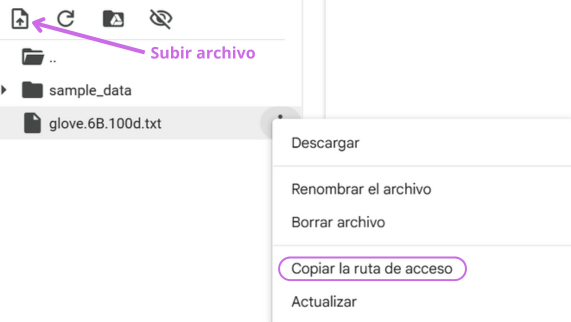

In [ ]:
#@markdown ### **Configuración de Rutas**
glove_path = '/content/glove.6B.100d.txt'  #@param {type:"string"}

##4. Ejecutar la siguiente celda para comprobar que el paso anterior se hizo correctamente y definir los parametros restantes:



*   **`top_n_wordnet`**: Esta variable controla cuántos sinónimos (como máximo) se devolverán desde WordNet para cada palabra.
*   **`top_n_glove`**: Esta variable controla cuántas palabras relacionadas (como máximo) se devolverán desde GloVe para cada palabra.
*   **`frecuencia_maxima`**: Esta variable establece el umbral de frecuencia. Si una palabra aparece en el texto de entrada más veces que este valor, se considerará "frecuente" y se buscarán sugerencias para ella.



In [ ]:
#@markdown **Opciones de Recomendación:**
top_n_wordnet = 5  #@param {type:"integer"}
top_n_glove = 5  #@param {type:"integer"}

#@markdown **Opciones de Análisis de Texto:**
frecuencia_maxima = 3  #@param {type:"integer"}
# Carga de GloVe
try:
    glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)
except FileNotFoundError:
    print("ERROR: No se encontró el archivo GloVe.  Asegúrate de que la ruta sea correcta.")
    glove_model = None
except ValueError:
    print("Error, El archivo no tiene el formato solicitado")
    glove_model = None
except Exception as e:
    print(f"Error desconocido cargando Glove {e!r}")
    glove_model=None

##5. Realizar el código de las siguientes funciones en la celda a continuación, ejecutarla y posteriormente ejecutar la celda de "Pruebas Unitarias" para comprobar su validez.

A continuación, se describen las funciones a implementar. Para cada función, se proporciona:

*   **Nombre de la función y parámetros:** Incluye los tipos de datos esperados.
*   **Docstring:** Una descripción detallada del propósito de la función, sus argumentos y el valor de retorno esperado. *Debe leerse con atención*.
*   **Esqueleto de la función:** El código básico de la función, con un `pass` donde debe escribirse la implementación.
* **Pruebas unitarias:** Cada función cuenta con una prueba unitaria para verificar el correcto funcionamiento del código.

**Importante:**

*   **No se deben modificar los nombres de las funciones ni los parámetros.** Las pruebas unitarias dependen de ellos.
*   **Es necesario leer cuidadosamente los docstrings.** Contienen información esencial.
*   **Se debe reemplazar `pass` con la implementación real**
*   **Es necesario ejecutar las pruebas unitarias después de implementar cada función.**

**Ejemplo:**

```
def Nombre de la funcion(parametros):
    """
    Docstring

    Args:
        Entradas

    Returns:
        salidas (return ...)
    """
    # --- IMPLEMENTAR AQUÍ ---
    pass # Reemplazar 'pass' con la implementación real

```

In [ ]:
# --- Funciones a Implementar ---

# Función 1 - sinónimos con WordNet
def wordnet_synonyms(word, top_n=top_n_wordnet):
    """
    Obtiene sinónimos de WordNet para una palabra dada.

    Args:
        word (str): La palabra para la cual buscar sinónimos.
        top_n (int): El número máximo de sinónimos a devolver.

    Returns:
        list: Una lista de sinónimos (strings).  Una lista vacía si no hay sinónimos.
    """
    syns = []
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            s = lemma.name().replace('_', ' ')
            if s.lower() != word.lower() and s not in syns:
                syns.append(s)
                if len(syns) >= top_n:
                    return syns
    return syns


# Función 2 - palabras relacionadas GloVe
def glove_related_words(word, top_n=top_n_glove):
    """
    Obtiene palabras relacionadas de GloVe para una palabra dada.

    Args:
        word (str): La palabra para la cual buscar palabras relacionadas.
        top_n (int): El número máximo de palabras relacionadas a devolver.

    Returns:
        list: Una lista de palabras relacionadas (strings). Una lista vacía si no hay coincidencias.
    """
    if glove_model is None:
        return []
    try:
        sims = glove_model.most_similar(word, topn=top_n)
        return [w for w, _ in sims]
    except KeyError:
        return []



# Función 3 - preprocesamiento de texto
def preprocess_text(text):
    """
    Preprocesa el texto:
    -> Tokeniza (divide en palabras).
    1. Convierte a minúsculas.
    2. Elimina guiones y guiones bajos para unir palabras compuestas.
    3. Elimina todo lo que no sea letra o dígito o espacio.
    4. Tokeniza dividiendo por espacios.
    5. Elimina stop words de inglés.

    Args:
        text (str): El texto a preprocesar.

    Returns:
        list: Una lista de palabras preprocesadas.

    """
    # 1. Minúsculas
    txt = text.lower()
    # 2. Elimina guiones y guiones bajos para unir palabras compuestas.
    txt = txt.replace('-', '').replace('_', '')
    # 3. Quitar puntuación y caracteres no alfanuméricos
    txt = re.sub(r'[^a-z0-9\s]', ' ', txt)
    # 4. Tokenización por espacios (split elimina múltiples espacios y tabs)
    tokens = txt.split()
    # 5. Filtrar stopwords
    stops = set(stopwords.words('english'))
    return [tok for tok in tokens if tok and tok not in stops]

In [ ]:
# @markdown ### **Pruebas Unitarias**
# --- Pruebas Unitarias ---

class TestFunctions(unittest.TestCase):

    def test_preprocess_text(self):
        test_cases = [
            ("This is a test sentence.", ["test", "sentence"]),
            ("Hello, world!  123...", ["hello", "world", "123"]),
            ("  Extra   spaces  and\ttabs\n.", ["extra", "spaces", "tabs"]),
            ("Stopwords like the, a, and are removed.", ["stopwords", "like", "removed"]),
            ("", []),  # Caso de texto vacío
            ("¡Caracteres especiales!@#$%^&*()_+=-`~[]\{}|;':\",./<>?", ['caracteres', 'especiales']), #Caso con caracteres especiales
            ("UPPERCASE and lowercase.", ["uppercase", "lowercase"]), #Caso con mayusculas
            ("palabra-compuesta otra_palabra.", ["palabracompuesta", "otrapalabra"]) #Caso con palabras compuestas.

        ]
        for text, expected in test_cases:
            with self.subTest(text=text):  # Usar subTest para identificar cada caso
                result = preprocess_text(text)
                self.assertEqual(result, expected)

    def test_wordnet_synonyms(self):
        test_cases = [
            ("happy", ['felicitous', 'glad', 'well-chosen']),  # Esperamos al menos estos sinónimos
            ("run", ['tally', 'test', 'trial', 'footrace', 'foot race']),      # Diferentes synsets
            ("xyz123", []),  # Palabra que no existe en WordNet
            ("",[]), #Palabra vacia
            ("development", ['evolution', 'growth', 'growing', 'maturation', 'ontogeny']) #Palabra con muchos sinonimos.

        ]
        for word, expected in test_cases:
            with self.subTest(word=word):
                result = wordnet_synonyms(word, top_n=len(expected)) #Obtener la lista completa y comparar
                self.assertListEqual(sorted(result), sorted(expected))


    def test_glove_related_words(self):
        # Carga GloVe *dentro* de la prueba, *solo si es necesario*
        # Esto evita cargar el modelo si las otras pruebas fallan.
        try:
            glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)
        except (FileNotFoundError, ValueError) as e:
            self.skipTest(f"No se pudo cargar GloVe: {e}")  # Saltar la prueba si no se carga GloVe
            return  # Importante para evitar errores

        test_cases = [
            ("king", ["queen", "prince", "monarch"]),  # Palabras relacionadas
            ("computer", ['computers', 'software', 'technology', 'pc', 'hardware']),
            ("xyz123", []),  # Palabra que no existe en GloVe
            ("",[]), #Palabra vacia
        ]

        for word, expected in test_cases:
            with self.subTest(word=word):
                result = glove_related_words(word, top_n=5) #Usar un top_n fijo para la prueba.
                # Comprobar si las palabras esperadas están *dentro* del resultado
                for expected_word in expected:
                    self.assertIn(expected_word, result)
        del glove_model  # Liberar memoria


def combine_recommendations(wordnet_results, glove_results):
    """Combina recomendaciones de WordNet y GloVe."""
    return wordnet_results + [w for w in glove_results if w not in wordnet_results]



def get_recommendations(word):
    """Obtiene recomendaciones combinadas de WordNet y GloVe."""
    wordnet_syns = wordnet_synonyms(word)
    glove_related = glove_related_words(word)
    #Ya no combinamos las recomendaciones, devolvemos ambas por separado
    return wordnet_syns, glove_related



def analyze_text(text, frecuencia_maxima=frecuencia_maxima):
    """
    Analiza el texto y devuelve recomendaciones para palabras frecuentes.

    Returns:
        dict:  Claves: palabras frecuentes.  Valores: tuplas (sinónimos_wordnet, palabras_relacionadas_glove).
    """
    processed_words = preprocess_text(text)
    word_counts = Counter(processed_words)
    frequent_words = {word: count for word, count in word_counts.items() if count > frecuencia_maxima}

    recommendations = {}
    for word, _ in frequent_words.items():
        wordnet_recs, glove_recs = get_recommendations(word)
        recommendations[word] = (wordnet_recs, glove_recs)

    return recommendations


# --- Ejecutar pruebas unitarias (y luego la función principal si las pruebas pasan) ---
if __name__ == '__main__':
    suite = unittest.TestLoader().loadTestsFromTestCase(TestFunctions)
    result = unittest.TextTestRunner().run(suite)
    if result.wasSuccessful():  # Solo ejecutar main() si las pruebas pasan
        print("\n--- Todas las pruebas pasaron. Ejecutando la función principal... ---\n")
    else:
        print("\n--- Algunas pruebas fallaron.  No se ejecutará la función principal. ---\n")

...
----------------------------------------------------------------------
Ran 3 tests in 36.168s

OK



--- Todas las pruebas pasaron. Ejecutando la función principal... ---



##6. Ejecutar algunas pruebas del código final utilizando diversos textos (En ingles). A continuación, incluir un ejemplo representativo que demuestre óptimamente la funcionalidad implementada.


In [ ]:
#@title Prueba con texto 1

# --- Configuración (Parámetros) ---

def combine_recommendations(wordnet_results, glove_results):
    """Combina recomendaciones de WordNet y GloVe."""
    return wordnet_results + [w for w in glove_results if w not in wordnet_results]



def get_recommendations(word):
    """Obtiene recomendaciones combinadas de WordNet y GloVe."""
    wordnet_syns = wordnet_synonyms(word)
    glove_related = glove_related_words(word)
    #Ya no combinamos las recomendaciones, devolvemos ambas por separado
    return wordnet_syns, glove_related


def analyze_text(text, frecuencia_maxima=frecuencia_maxima):
    """
    Analiza el texto:
    1. Preprocesa el texto.
    2. Cuenta la frecuencia de cada palabra.
    3. Identifica palabras que exceden la frecuencia máxima.
    4. Para cada palabra frecuente, obtiene recomendaciones de sinónimos.

    Args:
        text (str): El texto a analizar.
        frecuencia_maxima (int): La frecuencia máxima permitida para una palabra.

    Returns:
        dict: Un diccionario donde las claves son las palabras frecuentes
              y los valores son tuplas de listas: (sinónimos_wordnet, palabras_relacionadas_glove).
    """
    processed_words = preprocess_text(text)
    word_counts = Counter(processed_words)
    frequent_words = {word: count for word, count in word_counts.items() if count > frecuencia_maxima}

    recommendations = {}
    for word, _ in frequent_words.items():
        wordnet_recs, glove_recs = get_recommendations(word)  # Obtener ambas listas
        recommendations[word] = (wordnet_recs, glove_recs) #Almacenar como tupla

    return recommendations

# --- Función Principal (para Colab) ---

def main():
    #@markdown ### **Texto de Entrada**
    texto_entrada = "The rapid development of artificial intelligence (AI) is transforming various aspects of our lives.  AI technologies, such as machine learning and deep learning, are being applied to a wide range of applications, from self-driving cars to medical diagnosis.  The development of these AI systems requires significant computational resources and large datasets.  However, the benefits of AI are undeniable, leading to increased efficiency, improved decision-making, and the automation of complex tasks. The ethical implications of AI, including bias in algorithms and job displacement, are also a major area of research and discussion. As AI continues to advance, it is crucial to consider both its potential benefits and potential risks.  The development of responsible AI practices is essential to ensure that AI is used for the good of humanity.  Many researchers are working on making AI more explainable and transparent. This area of AI is often called XAI, or Explainable Artificial Intelligence. The goal of XAI is to create AI systems that can explain their reasoning and decision-making processes. This development is crucial for building trust in AI. Another important area is the development of robust AI, meaning AI that is resistant to adversarial attacks and unexpected inputs." #@param {type:"string"}
    #Si no hay texto, se muestra un texto de prueba
    if texto_entrada == "":
        texto_entrada = """This is a test text. This text is used to test the application.
        The application should be able to count the words and suggest synonyms for
        words that are repeated more than a certain number of times. Test, text and
        application are the words to watch."""
    if glove_model is None:
        print("ERROR: El modelo GloVe no se cargó correctamente.  Revisa la configuración.")
        return


    recommendations = analyze_text(texto_entrada)

    if recommendations:
        print("\nPalabras frecuentes y sugerencias:")
        for word, (wordnet_suggestions, glove_suggestions) in recommendations.items():
            print(f"  '{word}':")
            print(f"    - WordNet Synonyms: {', '.join(wordnet_suggestions) or 'Sin sugerencias'}")
            print(f"    - GloVe Related Words: {', '.join(glove_suggestions) or 'Sin sugerencias'}")

    else:
        print("\nNo se encontraron palabras que excedan la frecuencia máxima.")


# --- Ejecutar la función principal ---
if __name__ == "__main__":
    main()


Palabras frecuentes y sugerencias:
  'development':
    - WordNet Synonyms: evolution, growth, growing, maturation, ontogeny
    - GloVe Related Words: projects, project, developing, environment, research
  'ai':
    - WordNet Synonyms: Army Intelligence, artificial intelligence, three-toed sloth, Bradypus tridactylus, artificial insemination
    - GloVe Related Words: hey, sugiyama, gonna, ya, fukuhara


In [ ]:
#@title Prueba con texto 2

# --- Configuración (Parámetros) ---

def combine_recommendations(wordnet_results, glove_results):
    """Combina recomendaciones de WordNet y GloVe."""
    return wordnet_results + [w for w in glove_results if w not in wordnet_results]



def get_recommendations(word):
    """Obtiene recomendaciones combinadas de WordNet y GloVe."""
    wordnet_syns = wordnet_synonyms(word)
    glove_related = glove_related_words(word)
    #Ya no combinamos las recomendaciones, devolvemos ambas por separado
    return wordnet_syns, glove_related


def analyze_text(text, frecuencia_maxima=frecuencia_maxima):
    """
    Analiza el texto:
    1. Preprocesa el texto.
    2. Cuenta la frecuencia de cada palabra.
    3. Identifica palabras que exceden la frecuencia máxima.
    4. Para cada palabra frecuente, obtiene recomendaciones de sinónimos.

    Args:
        text (str): El texto a analizar.
        frecuencia_maxima (int): La frecuencia máxima permitida para una palabra.

    Returns:
        dict: Un diccionario donde las claves son las palabras frecuentes
              y los valores son tuplas de listas: (sinónimos_wordnet, palabras_relacionadas_glove).
    """
    processed_words = preprocess_text(text)
    word_counts = Counter(processed_words)
    frequent_words = {word: count for word, count in word_counts.items() if count > frecuencia_maxima}

    recommendations = {}
    for word, _ in frequent_words.items():
        wordnet_recs, glove_recs = get_recommendations(word)  # Obtener ambas listas
        recommendations[word] = (wordnet_recs, glove_recs) #Almacenar como tupla

    return recommendations

# --- Función Principal (para Colab) ---

def main():
    #@markdown ### **Texto de Entrada**
    texto_entrada = "The profound and multifaceted nature of love influences nearly every aspect of human experience. Psychological research identifies several forms—passionate love, companionate love, and compassionate love—each with distinct emotional and behavioral patterns. Passionate love, marked by intense longing and arousal, often fuels the early stages of romantic relationships, whereas companionate love—grounded in deep friendship, mutual respect, and shared goals—sustains long-term bonds. Compassionate love extends beyond dyads, encompassing altruistic care for strangers and communities.  Cultivating healthy love requires emotional intelligence, open communication, and empathy. Partners who practice active listening and express appreciation regularly tend to report higher relationship satisfaction and resilience in the face of conflict. At the same time, challenges such as attachment anxieties, codependency, or mismatched “love languages” can generate misunderstandings and emotional distress. Understanding one’s own attachment style—secure, anxious, or avoidant—can guide individuals toward more constructive patterns of intimacy.  Neuroscientific studies reveal that love engages complex brain networks, involving reward pathways (dopamine), stress regulation (oxytocin), and social cognition (prefrontal cortex). This “neurobiology of love” helps explain why forming and maintaining loving connections contributes to better mental and physical health: lower stress levels, stronger immunity, and increased longevity. Yet, love’s vulnerabilities—heartbreak, loss, or unrequited feelings—underscore the need for self-care, boundary-setting, and sometimes professional support.  As our understanding of love deepens, interdisciplinary fields like Positive Psychology and Relationship Science are developing evidence-based interventions to foster empathy, conflict resolution skills, and gratitude. By combining insights from psychology, neuroscience, and sociology, we can promote relationships that are not only passionate and fulfilling but also resilient and equitable. In this way, responsible cultivation of love becomes an essential endeavor for personal well-being and social harmony." #@param {type:"string"}
    #Si no hay texto, se muestra un texto de prueba
    if texto_entrada == "":
        texto_entrada = """This is a test text. This text is used to test the application.
        The application should be able to count the words and suggest synonyms for
        words that are repeated more than a certain number of times. Test, text and
        application are the words to watch."""
    if glove_model is None:
        print("ERROR: El modelo GloVe no se cargó correctamente.  Revisa la configuración.")
        return


    recommendations = analyze_text(texto_entrada)

    if recommendations:
        print("\nPalabras frecuentes y sugerencias:")
        for word, (wordnet_suggestions, glove_suggestions) in recommendations.items():
            print(f"  '{word}':")
            print(f"    - WordNet Synonyms: {', '.join(wordnet_suggestions) or 'Sin sugerencias'}")
            print(f"    - GloVe Related Words: {', '.join(glove_suggestions) or 'Sin sugerencias'}")

    else:
        print("\nNo se encontraron palabras que excedan la frecuencia máxima.")


# --- Ejecutar la función principal ---
if __name__ == "__main__":
    main()


Palabras frecuentes y sugerencias:
  'love':
    - WordNet Synonyms: passion, beloved, dear, dearest, honey
    - GloVe Related Words: me, passion, my, life, dream


### ¿Cómo funcionan GloVe y WordNet como recomendadores de sinónimos?

Como se evidenció a lo largo de la actividad GloVe y WordNet son dos herramientas utilizadas para recomendar sinónimos, pero funcionan de manera diferente.

WordNet es como una biblioteca, una base de datos o diccionario muy estructurado en inglés, que está organizada en conjuntos de sinónimos llamados synsets, donde cada palabra se relaciona con otras a través de significados específicos, organizados jerárquicamente, por lo que cuando se consulta un sinónimo en WordNet, se buscan estos synsets con sus definiciones y se extraen palabras que comparten un significado común con la palabra buscada, asi esta herramienta esta basada en reglas y conocimiento linguístico.

Por otro lado GloVe (Global Vectors for Word Representation), es un modelo de word embeddings entrenado con grandes cantidades de texto y que se encarga de representar las palabras como vectores en un espacio multidimensional, donde la distancia entre vectores refleja la similitud de uso en contexto, por lo que si dos palabras aparecen en contextos similares o son "vecinas", sus vectores estarán cerca, por lo que se consideran que tienen alguna relacion, así GloVe puede recomendar palabras que, aunque no sean sinónimos exactos o perfectos, aparecen en contextos similares.

En conclusión, WordNet ofrece sinónimos basados en significados definidos, mientras que GloVe encuentra palabras relacionadas por patrones estadísticos y vectores. En ese orden de ideas, como fue evidente, ambos enfoques se complementan ya que WordNet es más preciso semánticamente y GloVe es más flexible y útil para aplicaciones como análisis de texto o generación de lenguaje natural.